# US Baby Names 1880-2022

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 to 2022, and the data can be found at http://www.ssa.gov/oact/babynames/limits.html. I am going to analyze the following from this Dataset:
(1) Analyzing naming trends.
(2) Measuring the increase in naming diversity.
(3) The "last letter" revolution.
(4) Boy names that became girl names (and vice versa).

After downloading the "National data" file names.zip and unzipping it, we will have a directory containing a series of files like yob1880.txt. We can see the first 10 lines of one of the files:

In [1]:
!head -n 10 names/yob1880.txt

Since this is a nicely comma-separated form, it can be loaded into a DataFrame:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'birth'])

In [3]:
names1880


,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


Next, we are going to assemble the data files into a single DataFrame and further to add a year field.

In [4]:
years = range(1880, 2023)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path ='names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

In [5]:
names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


Now we can start aggregating the data at the year and sex level:

In [6]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [7]:
total_births.tail()

sex,F,M
year,,
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913
2022,1628730,1733166


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

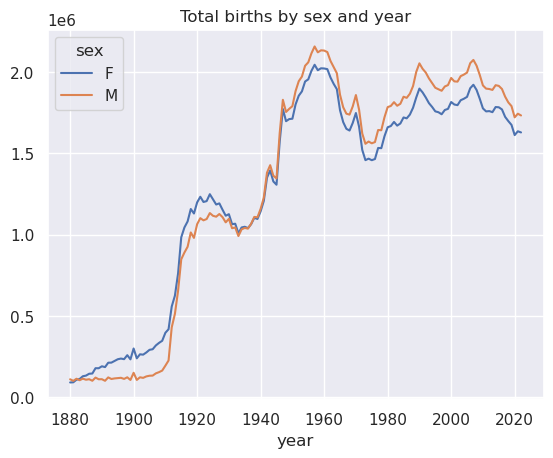

In [8]:


total_births.plot(title='Total births by sex and year')

Next I am inserting a column prop with the fraction of babies given each name relative to the total number of births. For example, a prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name.

In [9]:


def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)

In [10]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


Let's verify that the prop column sums to 1 within all the grooups:

In [11]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

Now I am going to extract the top 500 names for each sex/year combination:

In [12]:
def get_top500(group):
    return group.sort_values(by='births', ascending=False)[:500]
grouped = names.groupby(['year', 'sex'])
top500 = grouped.apply(get_top500)
top500.reset_index(inplace=True, drop=True)

In [13]:
top500


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
142995,Gregory,M,607,2022,0.000350
142996,Princeton,M,607,2022,0.000350
142997,Roberto,M,607,2022,0.000350
142998,Leland,M,605,2022,0.000349


I will use this Top 500 dataset in the following investigations: 

# (1) Analyzing Naming Trends

In [14]:
boys = top500[top500.sex == 'M']
girls = top500[top500.sex == 'F']
total_births = top500.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [15]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1880 to 2022
Columns: 3361 entries, Aaden to Zyaire
dtypes: float64(3361)
memory usage: 3.7 MB


Now we are going to plot for a number of Johns or Marys for each year:

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

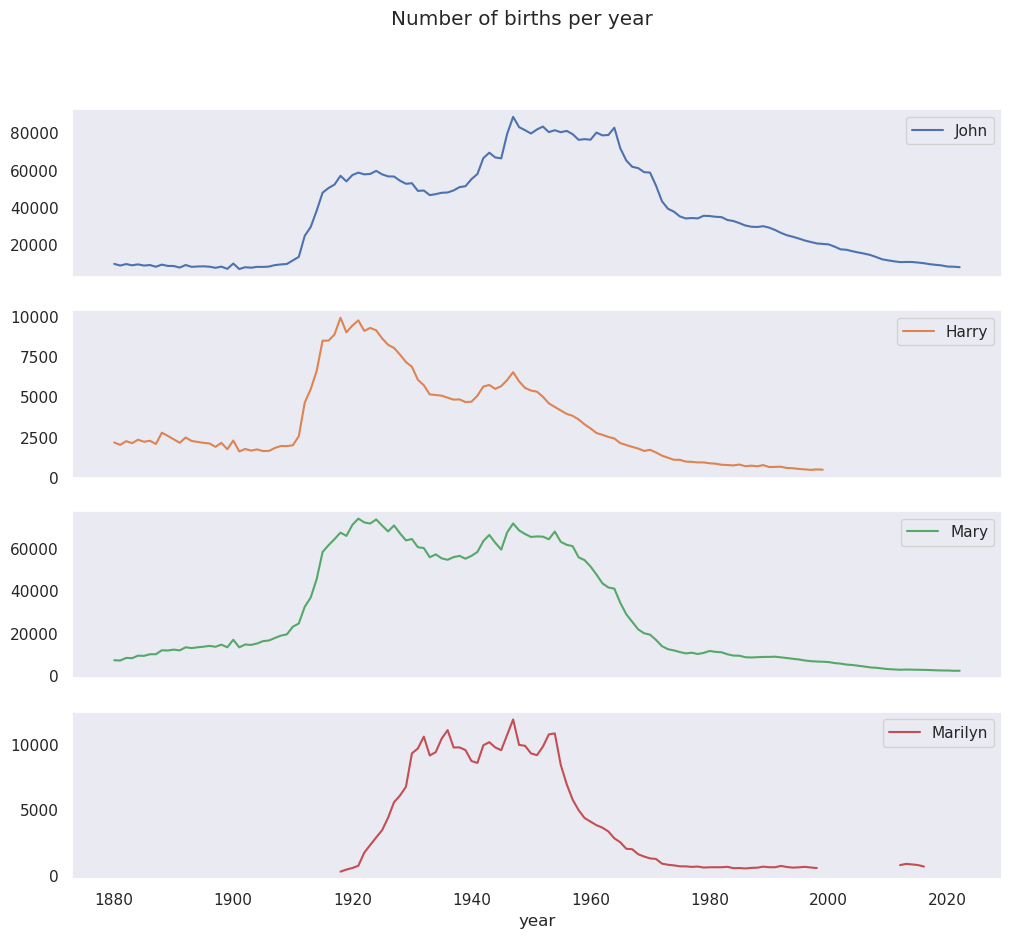

In [16]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

By looking at this, we might conclude that these names have grown out of favor with the American population.

# (2) Measuring the increase in naming diversity

One measure is the proportion of births represented by the top 500 most popular names:

<Axes: title={'center': 'Sum of table500.prop by year and sex'}, xlabel='year'>

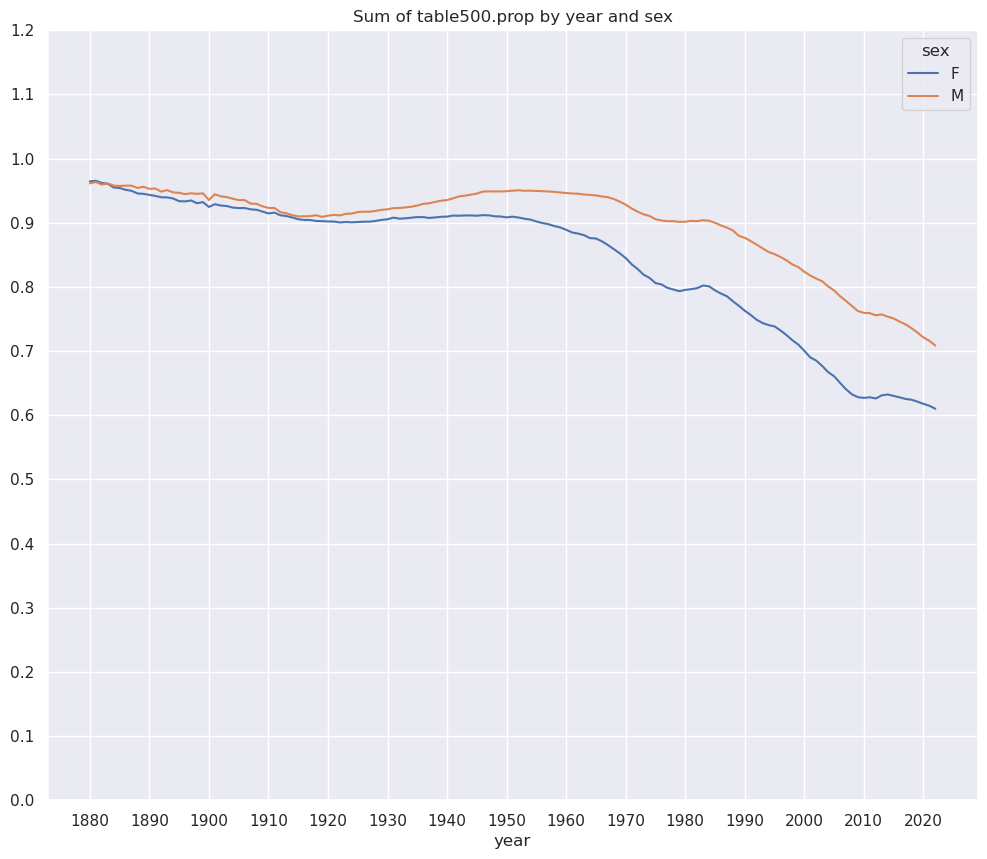

In [17]:
table = top500.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table500.prop by year and sex', yticks=np.linspace(0, 1.2, 13), figsize=(12, 10), xticks=range(1880, 2030, 10))

We can see that, there appears to be increasing name diversity(decreasing total proportion in the top 500). 

In [18]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
130500,Jacob,M,22144,2010,0.011547
130501,Ethan,M,18011,2010,0.009392
130502,Michael,M,17374,2010,0.009059
130503,Jayden,M,17192,2010,0.008964
130504,William,M,17064,2010,0.008898
...,...,...,...,...,...
130995,Ryland,M,523,2010,0.000273
130996,Terry,M,521,2010,0.000272
130997,Deandre,M,520,2010,0.000271
130998,Jamison,M,518,2010,0.000270


In [19]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [20]:
prop_cumsum[:10]

130500    0.011547
130501    0.020938
130502    0.029998
130503    0.038962
130504    0.047860
130505    0.056599
130506    0.065186
130507    0.073454
130508    0.081559
130509    0.089643
Name: prop, dtype: float64

In [21]:
prop_cumsum.values.searchsorted(0.5)

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top500.groupby(['year', 'sex']).apply(get_quantile_count)


In [22]:
diversity = diversity.unstack('sex')

In [23]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

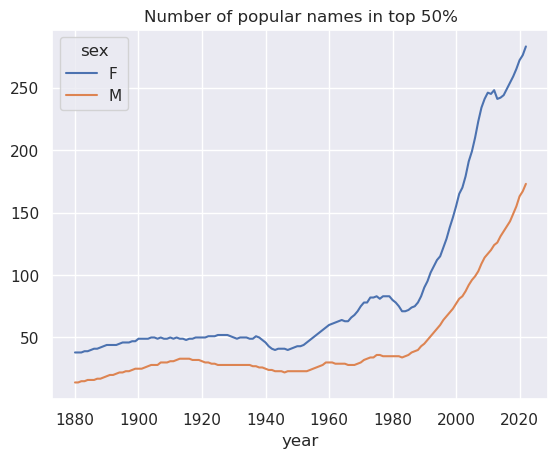

In [24]:
diversity.plot(title="Number of popular names in top 50%")

As we can see, girl names have always been diverse than boy names, and they have only become more so over time.

# (3) The "last letter" revolution

In [25]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

Then we select out three representative years spanning the history and print the first few rows:

In [26]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b                 NaN     694.0     455.0    411.0    3911.0   39304.0
c                 5.0      49.0     958.0    482.0   15458.0   23364.0
d              6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e            133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [27]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [28]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000156  0.000377  0.002260  0.009488  0.001406
h            0.051531  0.036220  0.076011  0.045564  0.037914  0.051828
i            0.001526  0.039965  0.031700  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000356  0.036579  0.049374  0.018531
l            0.043188  0.033871  0.026391  0.065023  0.104888  0.070455
m            0.001200  0.008611  0.002599  0.058046  0.033832  0.024707
n            0.079238  0.130680  0.140044  0.143387  0.152510  0.362404
o            0.001672  0.002440  0.001247  0.017064  0.012840  0.042558
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018045  0.064472  0.031050  0.087390
s            0.039036  0.012762  0.013336  0.130797  0.102699  0.065160
t            0.027432  0.015197  0.007838  0.072885  0.065643  0.022861
u            0.000683  0.000574  0.000416  0.000124  0.000057  0.001227
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007706  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116753  0.077345  0.161011  0.058207
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

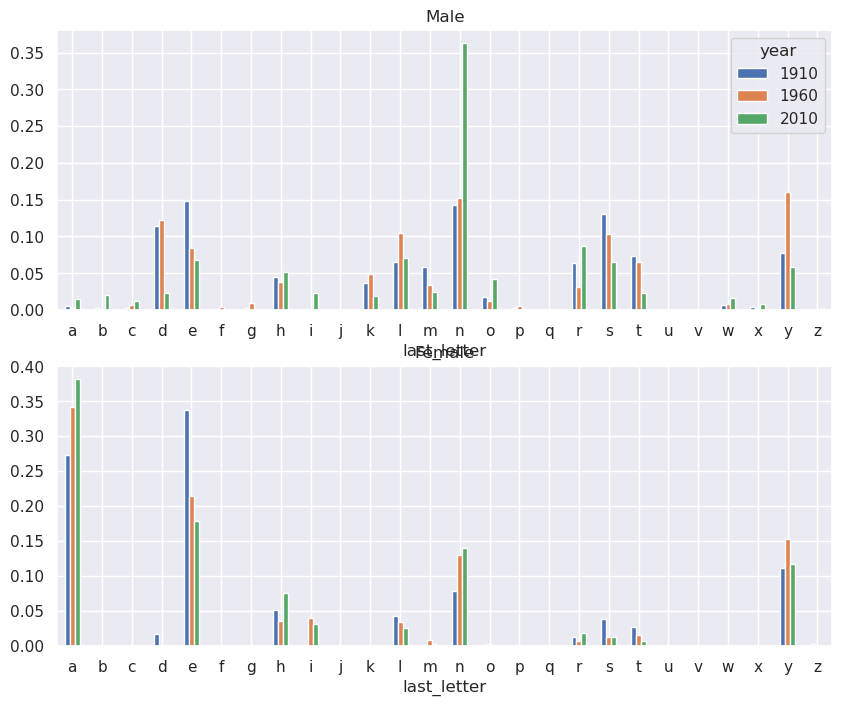

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male', label=False)
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)


As we can see boy names in n have experience significant growth since 1960s.

In [30]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

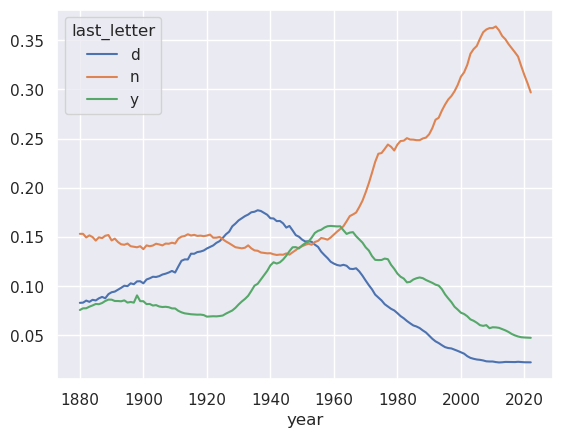

In [31]:
dny_ts.plot()

# (4) Boy names that became girl names (and vice versa)

One example is the name Lesley or Leslie. Going back to the top500 DataFrame, I compute a list of names occuring in the dataset starting with "lesl":

In [33]:
all_names = pd.Series(top500.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

652     Leslie
1930    Lesley
2805     Lesly
dtype: object

In [34]:
filtered = top500[top500.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Lesley     22298
Leslie    371354
Lesly       8044
Name: births, dtype: int64

In [36]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN


<Axes: xlabel='year'>

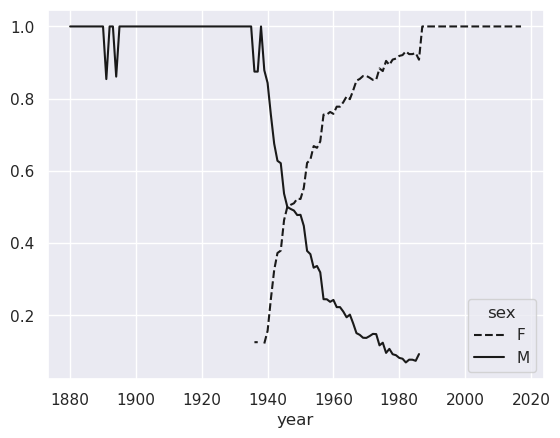

In [37]:
table.plot(style={'M':'k-', 'F':'k--'})